In [11]:
%tensorflow_version 1.x

import tensorflow as tf
import numpy as np
import keras
import cv2 as cv2
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical
from keras.datasets import cifar10
from sklearn.metrics import confusion_matrix, classification_report
import itertools

Extracting data from cifar10

In [12]:
def get_cifar10():
    """Retrieve the CIFAR dataset and process the data."""
    # Set defaults.
    nb_classes = 10
    batch_size = 64
    input_shape = (3072,)

    # Get the data.
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    show_dataDistribution(x_train, x_test, y_train, y_test)
    x_train = x_train.reshape(50000, 3072)
    x_test = x_test.reshape(10000, 3072)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    # convert class vectors to binary class matrices
    y_train = to_categorical(y_train, nb_classes)
    y_test = to_categorical(y_test, nb_classes)

    return (nb_classes, batch_size, input_shape, x_train, x_test, y_train, y_test) 

In [19]:
def show_dataDistribution(x_train, x_test, y_train, y_test):
  fig, axs = plt.subplots(1,2,figsize=(15,5)) 
  # Count plot for training set
  sns.countplot(y_train.ravel(), ax=axs[0])
  axs[0].set_title('Distribution of training data')
  axs[0].set_xlabel('Classes')
  # Count plot for testing set
  sns.countplot(y_test.ravel(), ax=axs[1])
  axs[1].set_title('Distribution of Testing data')
  axs[1].set_xlabel('Classes')
  plt.show()
  print('x_train shape: ', x_train.shape)
  print('y_train shape: ', y_train.shape)

  #plot random image:
  print('\nsample picture: \n') 
  img = 999
  plt.figure(figsize=(4, 2))
  plt.subplot(1, 2, 1)
  plt.imshow(x_train[img], interpolation='none')
  


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


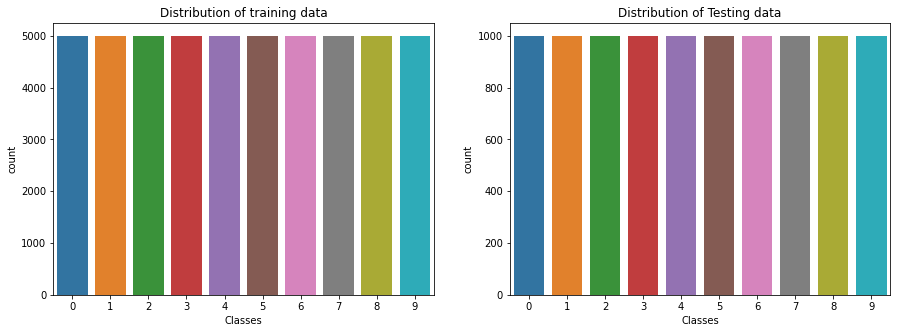

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)

sample picture: 



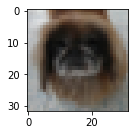

In [20]:
nb_classes, batch_size, input_shape, x_train, x_test, y_train, y_test = get_cifar10()

In [ ]:
features = 3072
categories = nb_classes

x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, categories])
W = tf.Variable(tf.zeros([features,categories]))
b = tf.Variable(tf.zeros([categories]))

y = tf.nn.softmax(tf.matmul(x, W) + b)
loss = -tf.reduce_mean(y_*tf.log(y))


# update = tf.train.AdamOptimizer(0.0001).minimize(loss)
update = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

correct_prediction = tf.equal(tf.argmax(y, 1),tf.argmax(y_, 1)) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))


sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
for epoch in range(0,1000):
    sess.run(update, feed_dict = {x:x_train, y_:y_train}) #BGD 
    train_acc = sess.run(accuracy, feed_dict={x:x_train, y_:y_train})
    test_acc = sess.run(accuracy, feed_dict={x:x_test, y_:y_test})
    if(epoch % 10 == 0):
      print ("epoch: %3d train_acc: %f test_acc: %f" % (epoch,train_acc, test_acc))